In [10]:
from mylinearregression import MyLinearRegression as MyLR
from polynomial_model import add_polynomial_features
from data_spliter import data_spliter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [11]:
data = pd.read_csv("../ressources/space_avocado.csv")

In [12]:
data.head()

,Unnamed: 0,weight,prod_distance,time_delivery,target
0,0,82.0,1467.0,5.0,798952.470207
1,1,28.0,2043.0,9.0,576947.962724
2,2,73.0,2416.0,7.0,720237.012328
3,3,55.0,2488.0,8.0,677671.772464
4,4,37.0,1335.0,3.0,675912.265367


In [13]:
x = np.array(data[['weight', 'prod_distance', 'time_delivery']])
y = np.array(data['target']).reshape(-1, 1)
x.shape, y.shape

((4900, 3), (4900, 1))

In [16]:
x_train, x_test, y_train, y_test = data_spliter(x, y, 0.8)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3920, 3), (980, 3), (3920, 1), (980, 1))

In [25]:
def plot(x, y, y_hat, labels, colors):
    try:
        plt.plot(x, y, 'o', color=colors[0], label=labels[0])
        plt.plot(x, y_hat, '.', color=colors[1], label=labels[1])
        plt.xlabel(labels[2])
        plt.ylabel(labels[3])
        plt.legend()
        plt.show()
    except Exception as err:
        print(err)

In [26]:
def regress(x, y, thetas, alpha, max_iter, labels, colors):
    try:
        print("------------")
        lm = MyLR(thetas, alpha=alpha, max_iter=max_iter)
        lm.fit_(x, y)
        y_pred = lm.predict_(x)
        mse = lm.loss_(y, y_pred)
        print("Score: {0}".format(mse))
        for i in range(0, x.shape[1]):
            plot(x[:,i], y, y_pred, labels, colors)
        print("------------")
    except Exception as err:
        print(err)

In [27]:
alpha=0.0000000001
max_iter=10000

------------
Score: 496662299.5192592


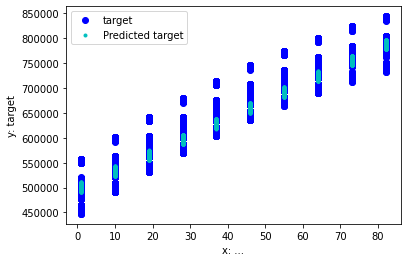

------------


In [29]:
regress(x_train, y_train, MyLR.normal_eq(x_train, y_train), alpha, max_iter,
        ['target', 'Predicted target', "x: ...", "y: target"],
        ['b', 'c'])